# 基于文本挖掘的食品添加剂知识图谱构建和应用研究

## 背景/简介

食品添加剂: 概念,滥用,超量使用 > 食品安全问题  [1,2,3]   
食品质量安全是“健康中国”和“质量强国”国家战略的重要组成部分，事关民生、民心，是各级政府的工作重心。食品添加剂的非法使用、滥用和过量使用是食品安全把控的关键环节，也是有关部门抽检的重要内容。
本论文焦食品添加剂，基于大数据实现对食品添加剂的知识图谱挖掘和时空演化分析。

## 方法

### 数据来源

数据来源包括：1）政府开发数据平台中的“食品监督抽查不合格信息”公开数据集（https://data.zjzwfw.gov.cn/jdop_front/channal/data_public.do, 代码cata_4370, 需更新）。从中可以提取各类被抽检食品和违规添加物的关联及频次强度。

2）与食品质量安全相关的网络文本，包括新闻报道、消费者舆情、政府通报。从中挖掘违规添加物的时空演化特征，同时可以不断更新知识图谱中食品实体与违规添加物的关联强度。

### 知识图谱构建方法

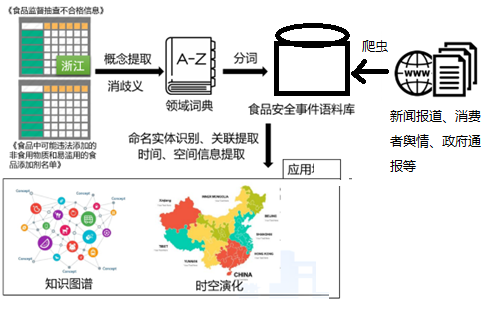

## 结果

### 语料库

食品添加主题的语料库,共5,730条记录 

http://spacs.brahma.pub/text/  (demo, demo)

### 知识图谱

提取到了xxx 概念/关联  

http://spacs.brahma.pub/association/

### 应用

知识图谱的交互式可视化

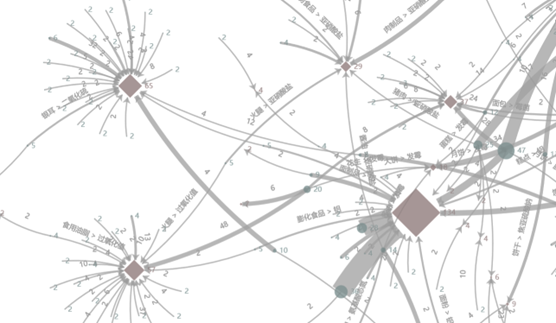

通过文本挖掘技术，从互联网各类文本中提取各种食品类型和相应化学物质的关联强度/支持度，形成食品实体和化学实体的知识图谱。进一步借助交互式可视化技术，用户可以直观了解特定食品和有害化学物质的关联强度/曝光频率。


时空演化可视化

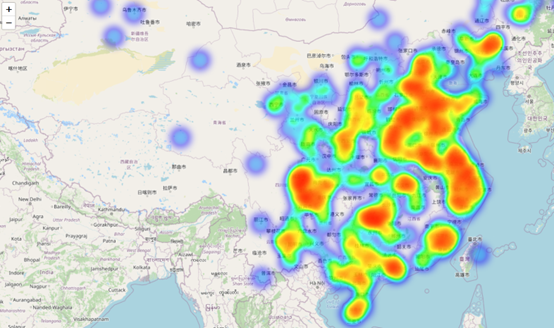

从新闻报道、网络舆情等文本数据中实时提取食品安全事件的时间和地理信息，为特定的食品安全事件渲染时空演化过程。便于用户掌握重大事件的起源、发展和消亡，以及不同食品的区域性和季节性风险特征。


# 讨论和展望

为普通公众，将为用户提供以下功能：1）食品添加剂百科。提供每一种添加剂的化学信息、毒理信息、易感食品、鉴别方法。2）知识图谱。通过关联规则学习和文本挖掘技术，获取各种食品类型和相应添加剂的关联强度/支持度，形成食品实体和化学添加剂实体的知识图谱。通过交互式可视化技术，用户可以了解感兴趣食品易滥用的添加剂种类和风险程度。3）食品添加剂安全事件的时空演化。通过实时挖掘食品安全事件，提取食品、化学添加剂、时间和空间等信息，实现时空可视化，便于用户掌握食品添加剂事件的区域性和季节性特征。

后台不断更新

讨论1\2\3

# 1. 字典构建

重点采集食品及添加剂两类实体，构建语义关联。

## 1.1 构建数据库表(ignore)
```
CREATE TABLE [AssociationSet] (
  [Id] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL
, [Code1] text NULL
, [Code2] text NULL
, [Entity1] text NULL
, [Entity2] text NULL
, [Name] text NULL
, [Code] text NULL
, [CodingSystem] text NULL
, [Strength] text NULL
, [Description] text NULL
, [Metadata] text NULL
, [Image] text NULL
, [Url] text NULL
);
```

## 1.2 导入常见的非法添加和易滥用的食品添加剂 "Food_Additives.xls"

全国打击违法添加非食用物质和滥用食品添加剂专项整治领导小组自2008年以来陆续发布了五批《食品中可能违法添加的非食用物质和易滥用的食品添加剂名单》。卫生部将五批名单汇总发布。

`/Association/Seed`

## 1.3 导入浙江省政府公开数据集(data.zjzwfw.gov.cn) "cata_4370.xls"及"cata_4370_history.xls"

首先由`Dictionary Construction.ipynb`提取到json (格式`[食品, 添加剂, 频次/强度]`)
```
[['鸡蛋布丁', '山梨酸', 2],
 ['青菜', '毒死蜱', 22],
 ['鲁花花生（奶香味）', '霉菌', 2],
 ['（白酒）四粮液', '甜蜜素', 10],
 ['散装鲜活鳊鱼', '恩诺沙星', 6],
 ['红糖馒头006', '甜蜜素', 4],
 ['红糖馒头006', '糖精钠', 4],
 ...
```
然后将json导入数据集，`/Association/Seed1`

## 1.4 手工录入

通过`/Association/`手工录入新增或修改字典项

# 2. 语料库构建

## 2.1 网络爬虫

/Web Crawler.ipynb`  

中国食品安全网 - 曝光专栏, http://www.cfsn.cn/news/, 访问时间：2018年5月，导出文件：20180505104507.h5  5.2MB  
中国食品安全网 - 专家解读专栏，http://www.cfsn.cn/zhuanti/， 访问时间：2018年5月，导出文件：20180505174019.h5  224KB    
食安中国，http://www.cnfoodsafety.com/， 访问时间：2018年5月，导出文件：20180504234042.h5 257MB  

将多个h5文件合并为一个`FoodSafetyAriticles.h5` （326MB）  
压缩为zip后体积为38MB

# 3. 加载语料库

Load hdf5 data in Zip

In [1]:
import zipfile
import io
import os.path
import pandas as pd

with zipfile.ZipFile('FoodSafetyAriticles.zip', 'r') as z: # Corpse.zip
    for filename in z.namelist(): 
        
        # 解压h5文件
        if (os.path.isfile(filename) == False):
            z.extract(filename)
        
        # 加载h5文件
        with pd.HDFStore(filename,  mode='r') as newstore:
            df = newstore.select('df')
z.close()

C:\Users\eleve\Anaconda3\lib\site-packages\tables\leaf.py:410: PerformanceWarning: The Leaf ``/df/_i_table/content/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [2]:
print(len(df))
df.head()

5599


,label,src,url,date,title,content
0,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26918.html,2018/0424,山东省高级人民法院公布四起典型案例,\n\n\n 山东省高级人民法院审判委员会专职审判委员韩芳丽介绍说，危害食品安全犯罪不仅扰...
1,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26917.html,2018/0424,青岛公布危害食药安全犯罪典型案例,\n\n\n 案例1：用工业用火碱、工业用甲醛加工小银鱼\n \n 2014年7月至今，...
2,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26915.html,2018/0424,食品微生物快速检测技术研究,\n\n\n 为保障食品安全，减少食源性疾病的发生，食源性致病菌的检测显得尤为关键。传统的...
3,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26914.html,2018/0424,检测实验室申请认可的关键环节,\n\n\n 实验室认可作为认可的重要门类，是国际通用的对实验室进行能力评价的方式。目前，...
4,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26913.html,2018/0424,甜酒酿的制作,\n\n\n 中国酿酒历史可追溯到磁山文化时期，距今已经有7000多年。1600年前的晋代...


Text(0.5, 0, 'theme')

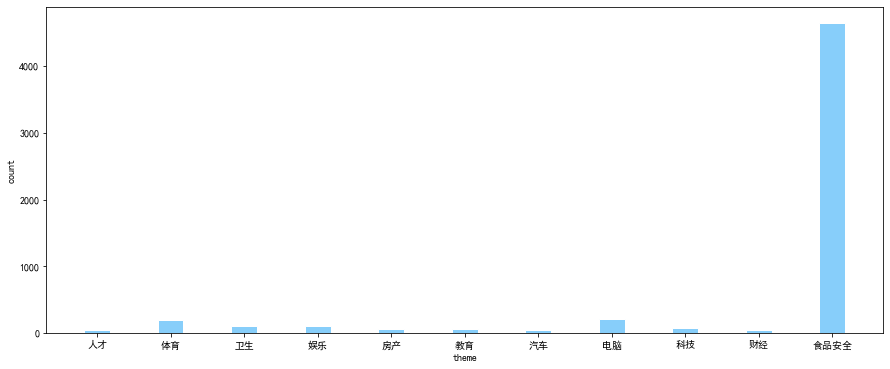

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))

plt.rcParams['font.sans-serif']=['SimHei']

df_grps = df.groupby(['label'])['label'].count()
X = list(df_grps.index)
Y = list(df_grps)

plt.bar(X, Y,width = 0.35,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('count')
plt.xlabel('theme')

In [37]:
import pandas as pd

with pd.ExcelWriter('FoodSafetyAriticles.xlsx', engine='xlsxwriter') as writer:    
    df.to_excel(writer, sheet_name='201805', index=False)

导入数据库 `/Text/Seed`

筛选“食品安全”相关的文本

In [54]:
df_foodsafety = df[df['label'] == '食品安全']
articles = df_foodsafety['content'].values
titles = df_foodsafety['title'].values
df_foodsafety.head()

,label,src,url,date,title,content
0,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26918.html,2018/0424,山东省高级人民法院公布四起典型案例,\n\n\n 山东省高级人民法院审判委员会专职审判委员韩芳丽介绍说，危害食品安全犯罪不仅扰...
1,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26917.html,2018/0424,青岛公布危害食药安全犯罪典型案例,\n\n\n 案例1：用工业用火碱、工业用甲醛加工小银鱼\n \n 2014年7月至今，...
2,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26915.html,2018/0424,食品微生物快速检测技术研究,\n\n\n 为保障食品安全，减少食源性疾病的发生，食源性致病菌的检测显得尤为关键。传统的...
3,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26914.html,2018/0424,检测实验室申请认可的关键环节,\n\n\n 实验室认可作为认可的重要门类，是国际通用的对实验室进行能力评价的方式。目前，...
4,食品安全,食安中国,http://www.cnfoodsafety.com/2018/0424/26913.html,2018/0424,甜酒酿的制作,\n\n\n 中国酿酒历史可追溯到磁山文化时期，距今已经有7000多年。1600年前的晋代...


# 时间信息

In [39]:
dates = df_foodsafety['date'].values

# 地理信息提取

https://github.com/DQinYuan/chinese_province_city_area_mapper

In [40]:
location_str = list(df_foodsafety['content'].values)
import cpca
geos = cpca.transform(location_str)
geos

,省,市,区,地址
0,山东省,烟台市,明光市,\n\n\n 山东省高级人民法院审判委员会专职审判委员韩芳丽介绍说，危害食品安全犯罪不仅扰...
1,广东省,哈尔滨市,五常市,\n\n\n 案例1：用工业用火碱、工业用甲醛加工小银鱼\n \n 2014年7月至今，...
2,山西省,太原市,,\n\n\n 为保障食品安全，减少食源性疾病的发生，食源性致病菌的检测显得尤为关键。传统的...
3,辽宁省,沈阳市,,\n\n\n 实验室认可作为认可的重要门类，是国际通用的对实验室进行能力评价的方式。目前，...
4,湖北省,孝感市,,\n\n\n 中国酿酒历史可追溯到磁山文化时期，距今已经有7000多年。1600年前的晋代...
...,...,...,...,...
4643,,,,\n\n中国食品科学技术学会常务理事 李宁\n乳矿物盐是经过安全性评价卫生部批准公告的新资源...
4644,湖南省,长沙市,,\n\n\n2012年10月19日，长沙市第三季度食品安全检验检测情况出炉，长沙肯德基有限公...
4645,,,,\n\n中国食品科学技术学会副理事长 刘秀梅\n汉堡是餐饮单位以面包加肉肠、蔬菜和奶酪等多种...
4646,湖南省,上海市,,\n\n2012年11月19日，21世纪网以“致命危机：酒鬼酒塑化剂超标260%”为题报道5...


In [41]:
from cpca import drawer
drawer.draw_locations(geos, "geos.html")

from IPython.display import IFrame
IFrame(src='geos.html', width=1600, height=900)

# 4. 加载词典

`dict.json`来自数据库表`AssociationSet`

In [3]:
import json

arr_food = []
arr_chem = []
dict_link = {}

with open('dict.json', encoding='UTF-8') as json_file:
    data = json.load(json_file)
    for x in data:
        arr_food.append(x['Entity1'])
        arr_chem.append(x['Entity2'])
        if x['Strength'] is not None:
            dict_link[(x['Entity1'],x['Entity2'])] = int(x['Strength'])
        else:
            dict_link[(x['Entity1'],x['Entity2'])] = 0
            
arr_food = list(set(arr_food))
arr_chem = list(set(arr_chem))

In [4]:
len(arr_food), len(arr_chem)

(454, 189)

In [43]:
dict_link

{('腐竹', '吊白块'): 0,
 ('粉丝', '吊白块'): 0,
 ('面粉', '吊白块'): 0,
 ('竹笋', '吊白块'): 0,
 ('辣椒粉', '苏丹红'): 0,
 ('辣椒酱', '苏丹红'): 0,
 ('辣味调味品', '苏丹红'): 0,
 ('腐皮', '王金黄、块黄'): 0,
 ('乳及乳制品', '蛋白精、三聚氰胺'): 0,
 ('腐竹', '硼酸与硼砂'): 0,
 ('肉丸', '硼酸与硼砂'): 0,
 ('凉粉', '硼酸与硼砂'): 0,
 ('凉皮', '硼酸与硼砂'): 0,
 ('面条', '硼酸与硼砂'): 0,
 ('饺子皮', '硼酸与硼砂'): 0,
 ('乳及乳制品', '硫氰酸钠'): 0,
 ('调味品', '玫瑰红B'): 0,
 ('茶叶', '美术绿'): 0,
 ('豆制品', '碱性嫩黄'): 0,
 ('海参', '工业用甲醛'): 0,
 ('干水产品', '工业用甲醛'): 0,
 ('血豆腐', '工业用甲醛'): 0,
 ('海参', '工业用火碱'): 0,
 ('干水产品', '工业用火碱'): 0,
 ('生鲜乳', '工业用火碱'): 0,
 ('金枪鱼', '一氧化碳'): 0,
 ('三文鱼', '一氧化碳'): 0,
 ('味精', '硫化钠'): 0,
 ('白砂糖', '工业硫磺'): 0,
 ('辣椒', '工业硫磺'): 0,
 ('蜜饯', '工业硫磺'): 0,
 ('银耳', '工业硫磺'): 0,
 ('龙眼', '工业硫磺'): 0,
 ('胡萝卜', '工业硫磺'): 0,
 ('姜等', '工业硫磺'): 0,
 ('小米', '工业染料'): 0,
 ('玉米粉', '工业染料'): 0,
 ('熟肉制品等', '工业染料'): 0,
 ('火锅底料及小吃类', '罂粟壳'): 0,
 ('乳与乳制品', '革皮水解物'): 0,
 ('小麦粉', '溴酸钾'): 0,
 ('乳与乳制品', 'β-内酰胺酶（金玉兰酶制剂）'): 0,
 ('糕点', '富马酸二甲酯'): 0,
 ('食用油脂', '废弃食用油脂'): 0,
 ('陈化大米', '工业用矿物油'): 0,
 ('冰淇淋', '工业明胶'): 0,
 ('肉皮冻等', 

# 加载停用词 Stop Words

In computing, stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search. 

In [5]:
%run get_stop_words.py
stpwrdlst = get_stop_words()
print(len(stpwrdlst))

2680


# 断句

原始文章过长，断句有利于提取局部性关联

In [46]:
import re

def is_empty(s):
    # \xa0 是不间断空白符, \u3000 是全角的空白符
    return not (s == '' or s is None or s == '\xa0' or s == '\u3000')

def sentence_segmentation(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return list(filter(is_empty, para.split("\n")))

In [47]:
sentences = []
article_ids = [] # 每个句子所属的article Id

for idx, a in enumerate(articles):
    ss = sentence_segmentation(a)
    sentences += ss
    article_ids += [idx] * len(ss) 

len(sentences), len(article_ids)

(146226, 146226)

# 分词

参考: [Word Segmentation.ipynb](Word Segmentation.ipynb) 

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple jieba

# Generate global vocab and document-term matrix X

X矩阵为m*n，m为文档数，n为单词数，用于记录每行文档单词出现的次数（词频）  

* 对于英文文本，可以直接使用sklearn.feature_extraction.text.CountVectorizer

In [48]:
import numpy as np
from tqdm import tqdm
import jieba

def document_term_matrix(texts, stpwrdlst, additional_dict):
        
    for word in additional_dict:
        jieba.add_word(word)    
    
        jieba.add_word('气相色谱')
        jieba.add_word('液相色谱')
        jieba.add_word('区块链')
        jieba.add_word('打call')
        jieba.add_word('一物一码')
        
    vocab = []
    d = {}
    wfs = []

    for t in tqdm(texts):
        # wf = word_frequency(t, stpwrdlst, additional_dict)
        wf = {}
        wordlist = list(jieba.cut(t, cut_all=False))
        for w in set(wordlist):
            if w not in stpwrdlst:            
                wf[w] = wordlist.count(w)
        wfs.append(wf)
        d.update(wf)

    vocab = list(d.keys())    
    
    X= np.zeros((len(texts), len(vocab)),dtype = np.uint16)  # document-term matrix
    
    print('Finished word segmentation. Begin calculating word frequency.')
    
    for i in tqdm(range(len(wfs))):
        wf = wfs[i]
        a = np.zeros(len(vocab))
        for w in wf:
            a[vocab.index(w)] = wf[w]
        X[i] = a
        
    return X, vocab, wfs, d

In [49]:
X, vocab, wfs, wf_all = document_term_matrix(sentences, stpwrdlst, arr_food + arr_chem)

  0%|▏                                                                          | 413/146226 [00:00<01:09, 2086.93it/s]

Finished word segmentation. Begin calculating word frequency.


100%|█████████████████████████████████████████████████████████████████████████| 146226/146226 [11:47<00:00, 206.70it/s]


In [50]:
X.shape, len(vocab)

((146226, 101867), 101867)

In [51]:
idx_food = []
idx_chem = []
selected_food = []
selected_chem = []

for s in arr_food:
    if s in vocab:
        idx_food.append(vocab.index(s))
        selected_food.append(s)
    #else:
    #    idx_food.append(-1)
    
for s in arr_chem:
    if s in vocab:
        idx_chem.append(vocab.index(s))
        selected_chem.append(s)
    #else:
    #    idx_chem.append(-1)

In [52]:
assert selected_food == list( np.array(vocab)[idx_food] )
assert selected_chem == list( np.array(vocab)[idx_chem] )

In [57]:
import json

sentences_foodsafety = []

df_sentences = pd.DataFrame()

# X_food = X[:,idx_food]
# X_chem = X[:,idx_chem]

for i in range(len(X)):
    x1 = X[i,idx_food] # X_food[i]
    x2 = X[i,idx_chem] # X_chem[i]
    a1 = np.array(selected_food)[np.where(x1>0)]
    a2 = np.array(selected_chem)[np.where(x2>0)]
    
    if ('配料：' in sentences[i] or '流言' in sentences[i] or '谣言' in sentences[i]):
        continue
    
    if (len(a1) > 0 and len(a2) > 0 and len(a1) <= 3 and len(a2) <= 3):
        
        sentences_foodsafety.append(sentences[i])
        all_words = np.array(vocab)[np.where(X[i]>0)]
        
        df_sentences = df_sentences.append({ 'Keywords': [ list(a1), 
                                                                      list(x1[np.where(x1>0)]),
                                                                      list(a2), 
                                                                      list(x2[np.where(x2>0)])
                                                                     ], 
                                           'Content': sentences[i],
                                           'Words':  [ list(all_words), 
                                                                 list(X[i][np.where(X[i]>0)]) 
                                                     ],
                                           'Source': article_ids[i],
                                            'Date': dates[article_ids[i]],
                                            'Geo': list (geos.values[article_ids[i],:3]),
                                            'Title': titles[article_ids[i]],
                                           },ignore_index=True)
        
import pandas as pd

with pd.ExcelWriter('FoodSafetySentences.xlsx', engine='xlsxwriter') as writer:    
    df_sentences.to_excel(writer, sheet_name='201805', index=False)

Recommend to manually convert xlsx to xls by Excel

# Reload Sentences

In [3]:
# Reload back
import pandas as pd

df_sentences = pd.read_excel('FoodSafetySentences.xls', index_col=None)  
df_sentences.head()

,Content,Date,Geo,Keywords,Source,Title,Words
0,后，姜宏战使用自刘明光处购买的工业明胶生产粉丝409.6吨并销售，销售金额131万余元。,2018/0424,"['山东省', '烟台市', '明光市']","[['粉丝'], [1], ['工业明胶'], [1]]",0,山东省高级人民法院公布四起典型案例,"[['销售', '姜宏战', '明光', '生产', '吨', '万余元', '金额', '..."
1,其间，姜宏战还向被告人江崇雪转售工业明胶3.5吨用于生产猪头肉、猪拱，销售金额7万余元。,2018/0424,"['山东省', '烟台市', '明光市']","[['猪头肉'], [1], ['工业明胶'], [1]]",0,山东省高级人民法院公布四起典型案例,"[['销售', '姜宏战', '生产', '被告人', '吨', '万余元', '金额', ..."
2,2013年6月至2014年7月，被告人江崇雪、孙振江等人在食品加工过程中，掺入工业明胶对...,2018/0424,"['山东省', '烟台市', '明光市']","[['猪头肉'], [1], ['工业明胶'], [1]]",0,山东省高级人民法院公布四起典型案例,"[['销售', '食品', '生产', '被告人', '月', '万余元', '金额', '..."
3,案例1：用工业用火碱、工业用甲醛加工小银鱼,2018/0424,"['广东省', '哈尔滨市', '五常市']","[['小银鱼'], [1], ['工业用火碱', '工业用甲醛'], [1, 1]]",1,青岛公布危害食药安全犯罪典型案例,"[['案例', '加工', '工业用甲醛', '小银鱼', '工业用火碱'], [1, 1,..."
4,2014年7月至今，被告人马某某利用工业用火碱、工业用甲醛等化工产品加工有毒、有害的小银...,2018/0424,"['广东省', '哈尔滨市', '五常市']","[['小银鱼'], [1], ['工业用火碱', '工业用甲醛'], [1, 1]]",1,青岛公布危害食药安全犯罪典型案例,"[['销售', '有毒', '有害', '被告人', '月', '年', '加工', '工业..."


## 词云可视化

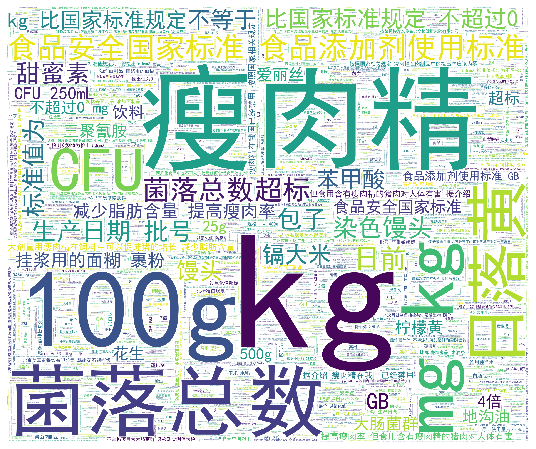

In [6]:
%run draw_wordcloud.py

long_string = ','.join(list(df_sentences['Content'].values))# Create a WordCloud object
stpwrdlst.append('网站')
stpwrdlst.append('原标题')
stpwrdlst.append('近日')
draw_wordcloud(long_string, stpwrdlst, savefile = 'wc.png')

# 更新关联强度 Update Strength

[`\Association\Update`] 对结果进行清洗，生成 `20200607_115636_selected.csv（FoodSafetyAssociations.csv）`，然后通过[`\Association\Import`] 导入/更新AssociationSet数据库表

# 力导向图可视化

[`\Association\Export`] 导出 Associations.json和 Associations.csv

In [2]:
import json
filename = 'Associations.csv'

# Reload back
import pandas as pd

df_assoc = pd.read_csv(filename, delimiter='\t')  
df_assoc.head()

,Entity1,Entity2,Strength
0,腐竹,吊白块,3
1,粉丝,吊白块,2
2,面粉,吊白块,2
3,竹笋,吊白块,2
4,辣椒粉,苏丹红,1


In [16]:
import networkx as nx

G = nx.DiGraph()

for index, row in df_assoc.iterrows():
    # edge = (row[0], row[1], row[2])
    G.add_edge(row[0].replace(u'\xa0', u' '), 
               row[1].replace(u'\xa0', u' '), 
               penwidth=row[2])
    
nx.nx_pydot.write_dot(G, 'g.dot')

### Encoding conversion ###
import codecs
BLOCKSIZE = 1048576 # or some other, desired size in bytes
with codecs.open('g.dot', "r", "gbk") as sourceFile:
    with codecs.open('g_utf8.dot', "w", "utf-8") as targetFile:
        while True:
            contents = sourceFile.read(BLOCKSIZE)
            if not contents:
                break
            targetFile.write(contents)

In [17]:
import pydotplus

graph = pydotplus.graph_from_dot_file("g_utf8.dot")
graph.write_png('g.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.465765 to fit



True

The visualization effect is not good. Use the js library.  

`/V/Force?min_support=2`

## TODO: 获取更多的网络文本

Get web text after 2018/05.